In [8]:
import torch
import torchvision
import torch.nn as nn
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import torch.nn.functional as F
import torch.optim as optim
import math
from torchvision import datasets, transforms
%matplotlib inline

We will now see Data Augmentation. Data Augmentation is very useful in case we have less training data to "artifically" generate new data. In this case we have better generalized data which the model can train on without getting overfitted. We will now see Data Augmentation for Images

PyTorch torchvision API has useful built in functions for various augmentation techniques. Lets see few of techniques we apply, but first lets create some helper functions that will help us 

In [36]:
# Helps in comverting Pytorch tensor to Numpy Array
def cnv_img_to_numpy(img): return img.cpu().permute(1,2,0).numpy()

# Function to visualize images on grid
def show_images_grid(x,rows,cols, figsize=(5,5)):
    fig, axs = plt.subplots(rows,cols,figsize=figsize)
    for i, ax in enumerate(axs.flatten()):
        ax.imshow(cnv_img_to_numpy(x[i]))
    plt.tight_layout()

Lets Create a Dataset and Dataloader to check the augmentations.

In [47]:
train_ds = datasets.CIFAR10(root='data/', 
                            train=True,
                            transform=transforms.ToTensor(),
                            download=True)

Files already downloaded and verified


In [48]:
train_dl = torch.utils.data.DataLoader(train_ds,batch_size=4)

In [49]:
img,lb = next(iter(train_dl))

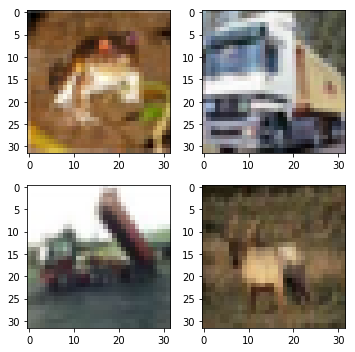

In [50]:
show_images_grid(img,2,2)

#### Brightness and Contrast Adjustment
Changing  the Brightness and Contrast is first of the basic technique we can use for Image Augmentation. Torchvision has multiple functions that can be applied during creation of Dataloader using the 'transforms' argument

In [69]:
def aug_adjust_brightness(x,brightness_fact=None):
    return transforms.functional.adjust_brightness(x,brightness_fact)

Torchvision has another function 'Lambda' that can be used to apply user created function as a transform.

Multiple transforms can be chained or applied together using 'Compose' function

In [83]:
aug_ds_brightness = datasets.CIFAR10(root='data/', 
                                train=True,
                                transform=transforms.Compose([
                                    transforms.Lambda(lambda x: aug_adjust_brightness(x,1.6)),
                                    transforms.ToTensor()
                                    ]),
                                download=False)

In [84]:
train_dl = torch.utils.data.DataLoader(aug_ds_brightness,batch_size=4)

In [85]:
img,lb = next(iter(train_dl))

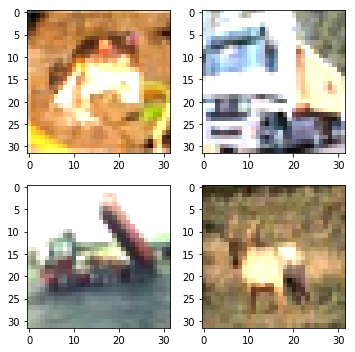

In [86]:
show_images_grid(img,2,2)

Now Lets Adjust the contrast and check

In [88]:
def aug_adjust_contrast(x,contrast_fact=None):
    return transforms.functional.adjust_contrast(x,contrast_fact)

In [89]:
aug_ds_contrast = datasets.CIFAR10(root='data/', 
                                train=True,
                                transform=transforms.Compose([
                                    transforms.Lambda(lambda x: aug_adjust_contrast(x,1.6)),
                                    transforms.ToTensor()
                                    ]),
                                download=False)

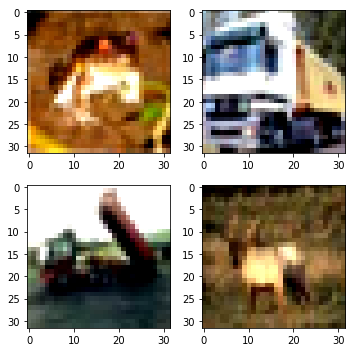

In [90]:
train_dl = torch.utils.data.DataLoader(aug_ds_contrast,batch_size=4)
img,lb = next(iter(train_dl))
show_images_grid(img,2,2)

#### Jitter
Another important augmentation technique we can use is applying jitter. Jitter is applying random noise to the image. It adds random noise to the image pixel value which helps in better generalization. However we should be careful in dealing with this kind of transformation as overuse may cause the learning to hamper.


We will use Torchvision "torchvision.transforms.ColorJitter" to randomly change brightness,contrast,hue & saturation of the image

In [93]:
aug_ds_jitter = datasets.CIFAR10(root='data/', 
                                train=True,
                                transform=transforms.Compose([
                                    transforms.ColorJitter(0.3,0.2,0.6,0.4),
                                    transforms.ToTensor()
                                    ]),
                                download=False)

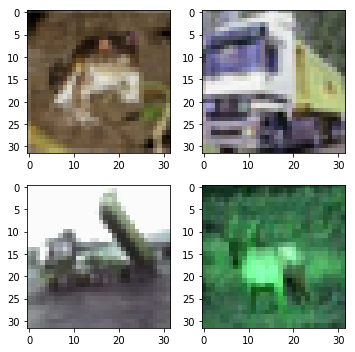

In [94]:
train_dl = torch.utils.data.DataLoader(aug_ds_jitter,batch_size=4)
img,lb = next(iter(train_dl))
show_images_grid(img,2,2)

#### Affine Transformation

Geometric transformation can be used to change the image spatially. This can be used to generate new artificial data sample that can help the neural network generalize better. Most popular of Affine Transformations include Rotation,Scaling,Translation.

We will now use the torchvision.transforms.RandomAffine which will introduce Random Affine transformation also keeping the image center invariant

In [114]:
aug_ds_affine = datasets.CIFAR10(root='data/', 
                                train=True,
                                transform=transforms.Compose([
                                    transforms.RandomAffine(15,(0.1,0.2),(1,1.4)),
                                    transforms.ToTensor()
                                    ]),
                                download=False)

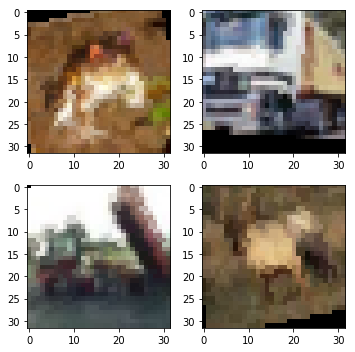

In [115]:
train_dl = torch.utils.data.DataLoader(aug_ds_affine,batch_size=4)
img,lb = next(iter(train_dl))
show_images_grid(img,2,2)

#### Flipping and Cropping

Another useful Data Augmentation techniques is Flipping and Cropping the image. Lets see below how we can do that using Torchvision transforms Functions

In [116]:
def flip_and_crop(x):
    x  = transforms.functional.crop(x,0,0,25,25)
    x  = transforms.functional.hflip(x)
    return x

In [117]:
aug_ds_flipcrop = datasets.CIFAR10(root='data/', 
                                train=True,
                                transform=transforms.Compose([
                                    transforms.Lambda(lambda x: flip_and_crop(x)),
                                    transforms.ToTensor()
                                    ]),
                                download=False)

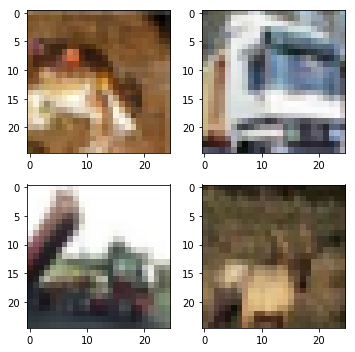

In [118]:
train_dl = torch.utils.data.DataLoader(aug_ds_flipcrop,batch_size=4)
img,lb = next(iter(train_dl))
show_images_grid(img,2,2)

There are other advanced methods also that can be used to further do advanced image augmentation like using Generative models like GAN to artifically generate like images. Neural Networks generally tend to perform a lot better when supplied with large more generalized dataset and image augmentation techniques we saw above certainly helps us in doing so.

**Thanks**